In [1]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import pandas as pd
import warnings
warnings.simplefilter('ignore')

df = pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [2]:
#Preprocessing the data

df_temp = df.head(80000)
df_temp

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
79995,79996,B000GPW55M,A2F46PVNG406K2,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,79997,B000JFKU9W,A1O3VKMF2XHAIY,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,79998,B000JFKU9W,A142KFKSKQSQ4F,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,79999,B000JFKU9W,A2NA2KHK2EP4J0,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [3]:
#Removing unwanted columns

df_temp = df_temp.drop(['Id'], axis = 1)
df_temp

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
79995,B000GPW55M,A2F46PVNG406K2,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,B000JFKU9W,A1O3VKMF2XHAIY,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,B000JFKU9W,A142KFKSKQSQ4F,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,B000JFKU9W,A2NA2KHK2EP4J0,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [4]:
df_temp = df_temp.drop(['ProductId'], axis = 1)
df_temp

,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
79995,A2F46PVNG406K2,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,A1O3VKMF2XHAIY,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,A142KFKSKQSQ4F,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,A2NA2KHK2EP4J0,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [5]:
df_temp = df_temp.drop(['UserId'], axis = 1)
df_temp

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...
79995,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [6]:
df_temp = df_temp.drop(['ProfileName'], axis = 1)
df_temp

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...
79995,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [7]:
df_temp = df_temp.drop(['HelpfulnessNumerator'], axis = 1)
df_temp

,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
79995,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [8]:
df_temp = df_temp.drop(['HelpfulnessDenominator'], axis = 1)
df_temp

,Score,Time,Summary,Text
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
79995,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [9]:
df_temp = df_temp.drop(['Time'], axis = 1)
df_temp

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...
79995,4,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,4,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,5,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [10]:
df_temp = df_temp.drop(['Summary'], axis = 1)
df_temp

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
79995,4,My favorite lifesaver! I like buying them in t...
79996,4,So after almost dying of dehydration from the ...
79997,4,"Very good taste, good crunch, not too salty, s..."
79998,5,"Awesome taste, perfect crunch; these are the b..."


In [11]:
df_temp['Sentiment'] = 0
df_temp

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,0
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,0
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,0
...,...,...,...
79995,4,My favorite lifesaver! I like buying them in t...,0
79996,4,So after almost dying of dehydration from the ...,0
79997,4,"Very good taste, good crunch, not too salty, s...",0
79998,5,"Awesome taste, perfect crunch; these are the b...",0


In [12]:
df_temp.dtypes

Score         int64
Text         object
Sentiment     int64
dtype: object

In [13]:
#Assigning the sentiment based on the score

for i in range(80000):
    if df_temp['Score'][i] >= 3:
        df_temp['Sentiment'][i] = 1
    else:
        df_temp['Sentiment'][i] = 0

In [14]:
df_temp

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,1
...,...,...,...
79995,4,My favorite lifesaver! I like buying them in t...,1
79996,4,So after almost dying of dehydration from the ...,1
79997,4,"Very good taste, good crunch, not too salty, s...",1
79998,5,"Awesome taste, perfect crunch; these are the b...",1


In [15]:
#Searching for null values

df_temp.isnull()

,Score,Text,Sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
79995,False,False,False
79996,False,False,False
79997,False,False,False
79998,False,False,False


In [16]:
df_temp.dropna(inplace=True)
df_temp

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,1
...,...,...,...
79995,4,My favorite lifesaver! I like buying them in t...,1
79996,4,So after almost dying of dehydration from the ...,1
79997,4,"Very good taste, good crunch, not too salty, s...",1
79998,5,"Awesome taste, perfect crunch; these are the b...",1


Text(0.5, 0, 'Scores')

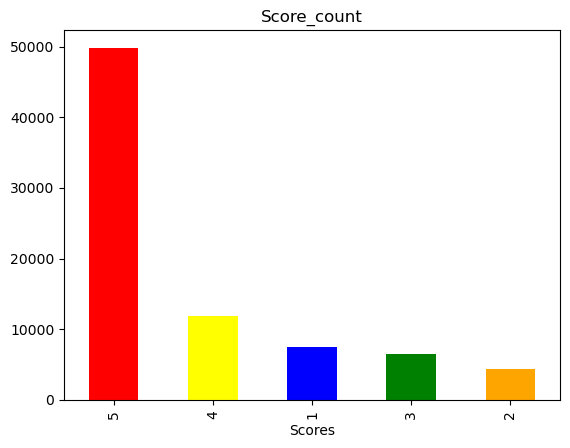

In [17]:
#Finding number of reviews of different scores.

colors = ['red','yellow','blue','green','orange']
df_temp.Score.value_counts().plot(kind="bar", title='Score_count',color = colors).set_xlabel('Scores')

Text(0.5, 0, 'Sentiments')

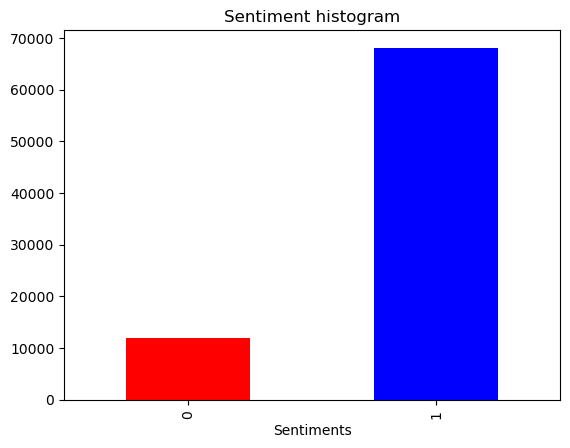

In [18]:
#Number of reviews of positive and negative sentiment

colors = ['red','blue']
df_temp['Sentiment'].value_counts().sort_index().plot(kind='bar', title='Sentiment histogram', color = colors).set_xlabel('Sentiments')

In [19]:
df_temp['Sentiment'].value_counts()

1    68090
0    11910
Name: Sentiment, dtype: int64

In [20]:
df_temp = df_temp.drop(['Score'], axis = 1)
df_temp

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1
...,...,...
79995,My favorite lifesaver! I like buying them in t...,1
79996,So after almost dying of dehydration from the ...,1
79997,"Very good taste, good crunch, not too salty, s...",1
79998,"Awesome taste, perfect crunch; these are the b...",1


In [21]:
df_temp['Text'] = df_temp['Text'].str.lower()
df_temp

,Text,Sentiment
0,i have bought several of the vitality canned d...,1
1,product arrived labeled as jumbo salted peanut...,0
2,this is a confection that has been around a fe...,1
3,if you are looking for the secret ingredient i...,0
4,great taffy at a great price. there was a wid...,1
...,...,...
79995,my favorite lifesaver! i like buying them in t...,1
79996,so after almost dying of dehydration from the ...,1
79997,"very good taste, good crunch, not too salty, s...",1
79998,"awesome taste, perfect crunch; these are the b...",1


In [22]:
#Removing stop words

stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.split() if word not in stp_words)
  return cleanreview
 
df_temp['Text']=df_temp['Text'].apply(clean_review)
df_temp

,Text,Sentiment
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanuts.....,0
2,"confection around centuries. light, pillowy ci...",1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price. wide assortment yummy...,1
...,...,...
79995,favorite lifesaver! like buying large bag life...,1
79996,almost dying dehydration grocery store sold pu...,1
79997,"good taste, good crunch, salty, shells fairly ...",1
79998,"awesome taste, perfect crunch; best seeds i've...",1


In [23]:
#Lemmatizing the text

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

df_temp['Text'] = df_temp['Text'].apply(lemmatize_words)
df_temp

,Text,Sentiment
0,buy several vitality can dog food products fin...,1
1,product arrive label jumbo salt peanuts...the ...,0
2,"confection around centuries. light, pillowy ci...",1
3,look secret ingredient robitussin believe find...,0
4,great taffy great price. wide assortment yummy...,1
...,...,...
79995,favorite lifesaver! like buy large bag lifesav...,1
79996,almost die dehydration grocery store sell pump...,1
79997,"good taste, good crunch, salty, shell fairly t...",1
79998,"awesome taste, perfect crunch; best seed i've ...",1


In [24]:
#Removing punctuations

import string
def removePunc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df_temp['Text'] = df_temp['Text'].apply(removePunc)
df_temp

,Text,Sentiment
0,buy several vitality can dog food products fin...,1
1,product arrive label jumbo salt peanutsthe pea...,0
2,confection around centuries light pillowy citr...,1
3,look secret ingredient robitussin believe find...,0
4,great taffy great price wide assortment yummy ...,1
...,...,...
79995,favorite lifesaver like buy large bag lifesave...,1
79996,almost die dehydration grocery store sell pump...,1
79997,good taste good crunch salty shell fairly thin...,1
79998,awesome taste perfect crunch best seed ive eve...,1


In [25]:
#Seggregating the positive and negative reviews

df_neg = df_temp[df_temp['Sentiment'] == 0]
df_neg        

,Text,Sentiment
1,product arrive label jumbo salt peanutsthe pea...,0
3,look secret ingredient robitussin believe find...,0
12,cat happily eat felidae platinum two years get...,0
16,love eat good watch tv look movies sweet like ...,0
26,candy red flavor plan chewy would never buy,0
...,...,...
79919,drink disaster taste it bb pina colada mix bad...,0
79920,high hop product like splenda normally drink ...,0
79921,margarita mix excellent ive also cranberry mar...,0
79963,product like expected tooks long time cook nor...,0


In [26]:
df_pos = df_temp[df_temp['Sentiment'] == 1]
df_pos

,Text,Sentiment
0,buy several vitality can dog food products fin...,1
2,confection around centuries light pillowy citr...,1
4,great taffy great price wide assortment yummy ...,1
5,get wild hair taffy order five pound bag taffy...,1
6,saltwater taffy great flavor soft chewy candy ...,1
...,...,...
79995,favorite lifesaver like buy large bag lifesave...,1
79996,almost die dehydration grocery store sell pump...,1
79997,good taste good crunch salty shell fairly thin...,1
79998,awesome taste perfect crunch best seed ive eve...,1


In [27]:
#Creating a data sample with a mixture of reviews of positive and negative

df_positive = df_pos.sample(n=25000)
df_negative = df_neg.sample(n=5000)
df_merged = pd.concat([df_positive, df_negative])
df_merged = df_merged.sample(frac=1)
df_merged

,Text,Sentiment
77930,excellent price one favorite oatmeals line rec...,1
4845,dog allergic dog food use newmans dog food sev...,1
36813,product arrive great shape dent cans milk sepa...,1
46185,since theres pic dog bones sure id getting in ...,1
7790,pamelas bake pancake mix very good however kno...,1
...,...,...
69989,use product 20 years nothing smell better dogs...,1
961,care product all think tea sisters use drink e...,0
24510,supermarket discontinue newmans organic black ...,1
46173,love gevalia signature crema tassimo me taste ...,1


In [28]:
df_pos2 = df_pos.sample(n=25000)
df_neg2 = df_neg.sample(n=5000)
df_merged2 = pd.concat([df_pos2,df_neg2])
df_merged2 = df_merged2.sample(frac=1)
df_merged2

,Text,Sentiment
45516,first sip wonder go finish strong drink use wh...,1
44340,chocolates tasty fact reach week late birthday...,0
72701,buy product expect familia original recipe pro...,0
14779,husband taste peas today delicious huge step b...,1
71572,please read ingredients may expect get big jar...,0
...,...,...
36951,give much really enjoy lite syrup think would ...,0
6402,ive try different beef jerkeys far find produc...,1
567,read reviews get nervous open bag recent order...,1
28488,first ingredient mix tea even list maltodextri...,0


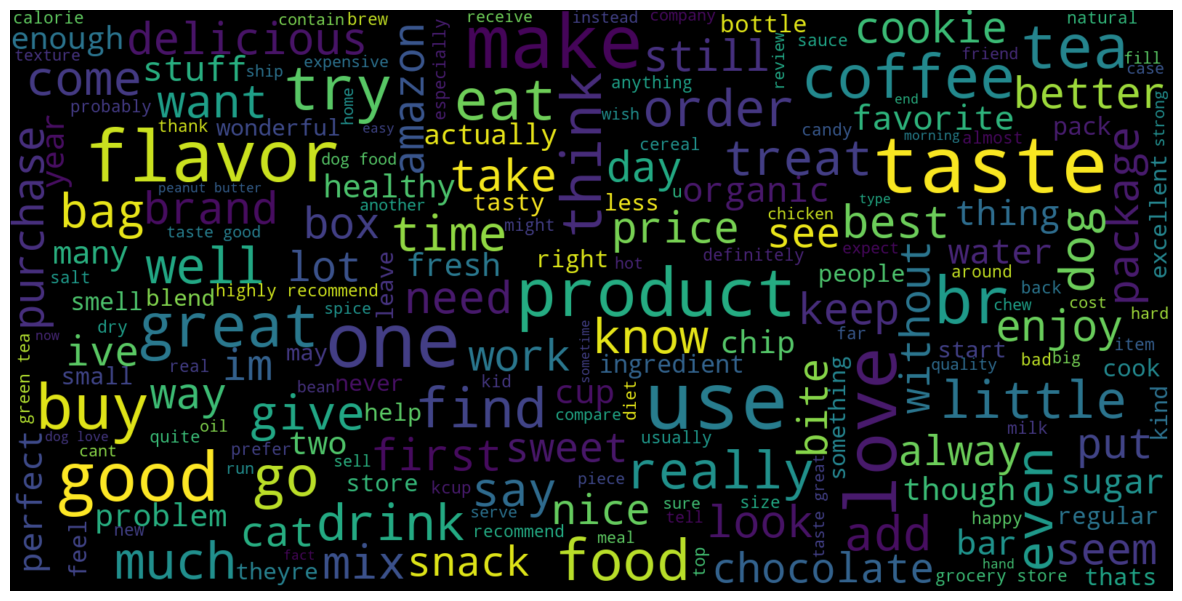

In [32]:
#Creating a wordcloud

consolidated=' '.join(word for word in df_merged['Text'][df_merged['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

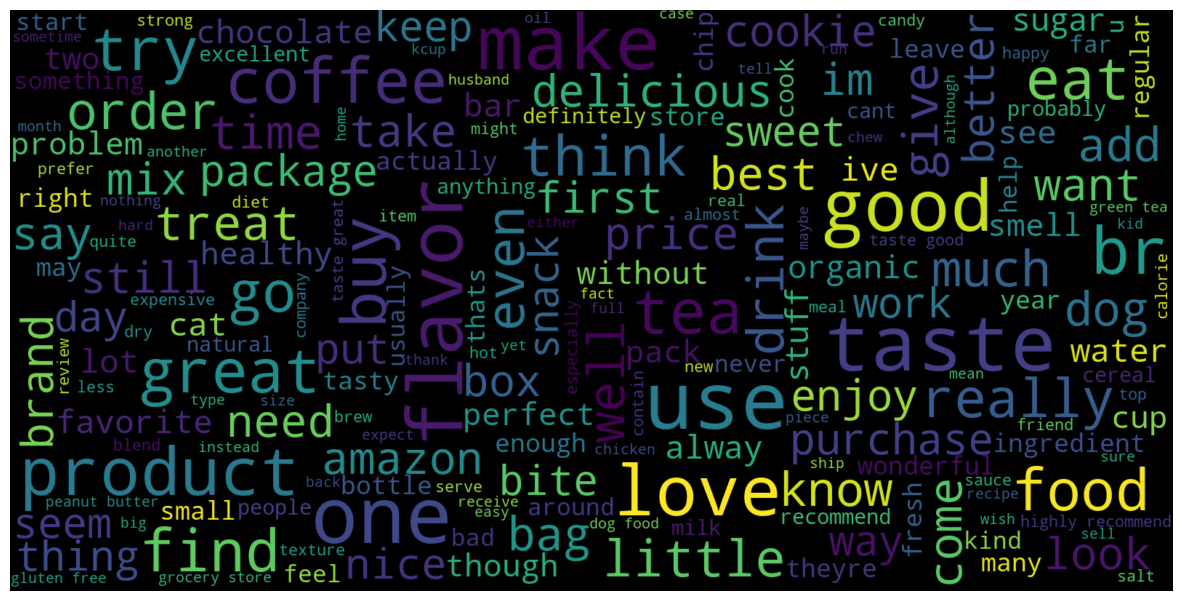

In [33]:
consolidated=' '.join(word for word in df_merged2['Text'][df_merged2['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,f1_score

In [30]:
cv=TfidfVectorizer() 
X1 = cv.fit_transform(df_merged['Text'] ).toarray()
X2 = cv.fit_transform(df_merged2['Text'] ).toarray()

In [31]:
x1_train ,x1_test,y1_train,y1_test=train_test_split(X1,df_merged['Sentiment'], test_size=0.20)

In [32]:
x2_train ,x2_test,y2_train,y2_test=train_test_split(X2,df_merged2['Sentiment'], test_size=0.25)

In [72]:
#Model--1 Logistic Regression

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs', max_iter=400)
 
model.fit(x1_train,y1_train)

pred1=model.predict(x1_test)

print('Accuracy score: ',accuracy_score(y1_test,pred1))
print('F1 score: ',f1_score(y1_test,pred1))

Accuracy score:  0.8878333333333334
F1 score:  0.9363834010776066


In [74]:
model.fit(x2_train,y2_train)
 
#testing the model
pred2=model.predict(x2_test)
 
#model accuracy
print(accuracy_score(y2_test,pred2))
print('Accuracy on training data',str(model.score(x2_train,y2_train)))
print('Accuracy on testing data',str(model.score(x2_test,y2_test)))
print('F1 score: ',f1_score(y2_test,pred2))

0.8795
Accuracy on training data 0.9112083333333333
Accuracy on testing data 0.8795
F1 score:  0.9308861485517637


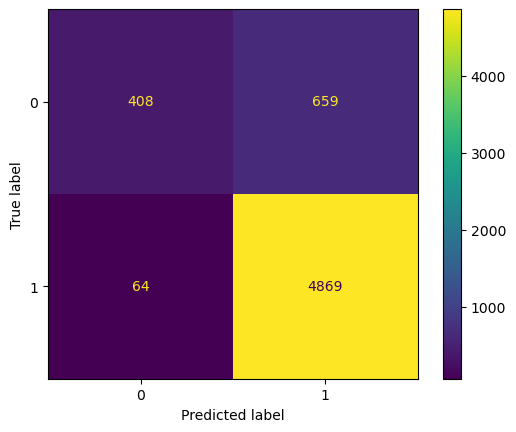

In [75]:
#Confusion Matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test,pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])
cm_display.plot()
plt.show()

In [33]:
#Model--2 Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators = 70)
model4.fit(x1_train,y1_train)
pred7 = model4.predict(x1_test)
print('Accuracy Score: ',accuracy_score(y1_test,pred7))
print('F1 Score: ',f1_score(y1_test,pred7))

Accuracy Score:  0.8568333333333333
F1 Score:  0.9202932170362809


In [43]:
df_merged = df_merged.sample(n=10000)
df_merged2 = df_merged2.sample(n=10000)

In [44]:
cv=TfidfVectorizer() 
X3 = cv.fit_transform(df_merged['Text'] ).toarray()
X4 = cv.fit_transform(df_merged2['Text'] ).toarray()

In [45]:
x3_train ,x3_test,y3_train,y3_test=train_test_split(X3,df_merged['Sentiment'], test_size=0.20)

In [46]:
x4_train ,x4_test,y4_train,y4_test=train_test_split(X4,df_merged['Sentiment'], test_size=0.20)

In [49]:
#Model 3--- XG boost classifier

from xgboost import XGBClassifier
model2 = XGBClassifier(random_state=42,learning_rate=0.9)
model2.fit(x3_train,y3_train)
pred3 = model2.predict(x3_test)
print('Accuracy Score: ',accuracy_score(y3_test,pred3))
print('F1 Score: ',f1_score(y3_test,pred3))

Accuracy Score:  0.856
F1 Score:  0.915936952714536


In [51]:

model2.fit(x4_train,y4_train)
pred4 = model2.predict(x4_test)
print('Accuracy Score: ',accuracy_score(y4_test,pred4))
print('F1 Score: ',f1_score(y4_test,pred4))

Accuracy Score:  0.7845
F1 Score:  0.8778690847265513


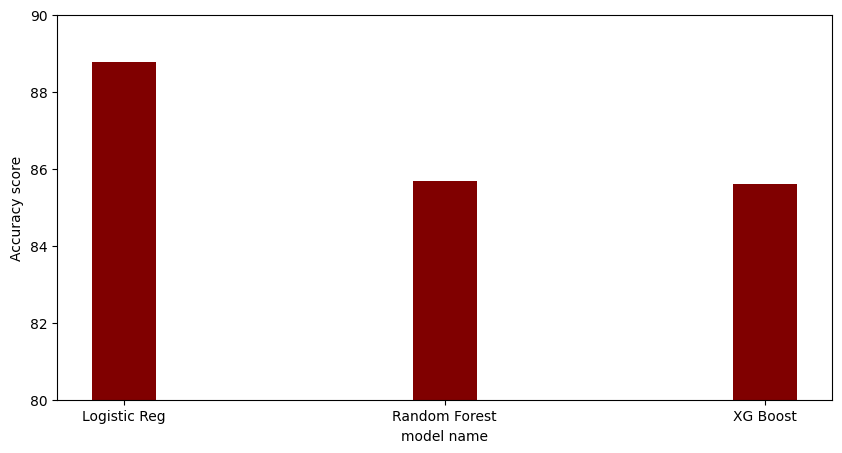

In [4]:
#Comparing the accuracy score of the three models

import matplotlib.pyplot as plt
accur = [88.78,85.68,85.60]
    
name = ['Logistic Reg','Random Forest','XG Boost']
fig = plt.figure(figsize = (10, 5))
plt.bar(name, accur, color ='maroon', width = 0.2)
 
plt.xlabel("model name")
plt.ylabel("Accuracy score")
plt.ylim([80,90])
plt.show()
